<style>
    h1 {
    text-align: center;
    color: Black
    }
    h2, h3, h4, p {
    text-align: left;
    color: Black
    }
    table, th, td {
    border: 1px solid black;
    border-collapse: collapse;
    text-align: center;
    padding: 0px
    }
    div.output {
    align-items: left
    }
</style>

#  Credit Scoring con Python y Scikit-Learn (Machine Learning) parte I.

<br>Bueno para empezar les dire que decidí hacer este post porque se ha puesto de moda el tema del machine learning, en realidad son modelos que existian desde hace buen tiempo y que permiten utilizar una cantidad de información para predecir el comportamiento de una variable o varias variables (suena parecido a las regresiones no?, pues estas también son modelos de machine learning) o clasificar data en base a patrones hallados en los mismos (segmentación de datos). Hay una gran cantidad de modelos de machine learning y aca veremos los principales que aparecen en la biblioteca de python scikit learn y que pueden aplicarse a modelos de credit scoring (clasificación).

Para Python les recomiendo que usen __[winpython](https://winpython.github.io/)__ (solo windows, pero es portable)  o __[anaconda](https://www.anaconda.com/download/)__ (es multiplataforma, pero requiere de instalación). Al instalar cualquiera de estas distribuciones encontraran los ejecutables Jupyter Notebook (el formato del post, los archivos tienen extensión es .ipynb) y Spyder (IDE que recomiendo para trabajar porque permite visualizar las variables y su tipo, los archivos tienen extensión es .py)

En la página del blog dejaré los notebooks (se abren con jupyter notebook), los scripts de python (recomiendo que usen spyder para trabajar con estos archivos) y los archivos en excel con la data usada en los ejemplos.

Los temas que trataremos en este post son:
1. Credit Scoring con Python y Scikit-Learn (Machine Learning).
    1. Preprocesamiento de la información.
    2. Uso de modelos de clasificación.
    3. Metricas de clasificación.
    4. Comparación entre modelos.    


## 1. Machine Learning con Scikit-Learn 
Bueno iendo directo al tema del post sin muchos preámbulos, hasta donde se hay 2 tipos de modelos de machine learning: los de aprendizaje supervisado y no supervisado. __El supervisado__ es aquel que usando los valores historicos para tratar de predecir el comportamiento de una variable, pueden ser de __clasificación__ (predecir un número entero o clase) o __regresión__ (predecir un número real o valor buscado). __El no supervisado__ es aquel que en base a data historica busca hallar patrones para clasificar información (problema de segmentación). Si quieren saber mas pueden ver en la pagina de __[scikit-learn](http://scikit-learn.org/stable/user_guide.html)__, en __[wikipedia](https://es.wikipedia.org/wiki/Aprendizaje_autom%C3%A1tico)__ o usando un buscador de internet =P.
En el caso de credit scoring, lo que se busca es distinguir entre clientes que te pueden pagar y los clientes que van a caer en default; de acuerdo a esta definición un modelo de score crediticio sería un problema de clasificación. Ahora vamos a realizar un ejemplo de elaborar un modelo de scoring con python y scikit-learn:

### A. Preprocesamiento de la información.
Como una buena práctica antes de usar los modelos de machine learning, se debe tratar la información ya que la mayoría de algoritmos de aprendizaje supervisado solo acepta números como entradas, para preparar la data se debe hacer lo siguiente:
* Si existe registros con data faltante, esta se pueden llenar con la moda, mediana o media dependiendo si es una categoría o número, o asignarle una nueva clase en caso sea una categoría.
* La información de variables de clases como sexo (M o F) o nivel socioeconomico (A,B,C,D,E), entre otros, debe convertirse, para ello se puede transformar cada valor en un número (Label Encoder), convertir cada valor en una variable dummy (one hot encoder).
* La información se debe estandarizar con media 0 y varianza 1, o escalar los valores entre 0 y 1 ya que varios de los algoritmos de machine learning son sensibles a la escala de los valores.

Ahora vamos a cargar la información del ejemplo y procesarla:

In [1]:
import pandas as pd
import numpy as np

#Cargando la información de la base de clientes
df = pd.read_excel('train_clientes.xlsx')#,index_col=0)

#mostramos el contenido de la tabla
with pd.option_context('display.max_rows', 20, 'display.max_columns', None):
    display(df)

,ID_CORRELATIVO,CODMES,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,SDO_ACTIVO_MENOS3,SDO_ACTIVO_MENOS4,SDO_ACTIVO_MENOS5,FLG_SEGURO_MENOS0,FLG_SEGURO_MENOS1,FLG_SEGURO_MENOS2,FLG_SEGURO_MENOS3,FLG_SEGURO_MENOS4,FLG_SEGURO_MENOS5,RANG_NRO_PRODUCTOS_MENOS0,FLG_NOMINA,NRO_ACCES_CANAL1_MENOS0,NRO_ACCES_CANAL1_MENOS1,NRO_ACCES_CANAL1_MENOS2,NRO_ACCES_CANAL1_MENOS3,NRO_ACCES_CANAL1_MENOS4,NRO_ACCES_CANAL1_MENOS5,NRO_ACCES_CANAL2_MENOS0,NRO_ACCES_CANAL2_MENOS1,NRO_ACCES_CANAL2_MENOS2,NRO_ACCES_CANAL2_MENOS3,NRO_ACCES_CANAL2_MENOS4,NRO_ACCES_CANAL2_MENOS5,NRO_ACCES_CANAL3_MENOS0,NRO_ACCES_CANAL3_MENOS1,NRO_ACCES_CANAL3_MENOS2,NRO_ACCES_CANAL3_MENOS3,NRO_ACCES_CANAL3_MENOS4,NRO_ACCES_CANAL3_MENOS5,NRO_ENTID_SSFF_MENOS0,NRO_ENTID_SSFF_MENOS1,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5,ATTRITION
0,35653,201208,1,Rang_ingreso_06,Lima,25.0,6.0,Rango_SDO_09,0,0,0,0,0,0,1,1,1,1,1,1,Rango_04,0,2,1,0,2,4,1,8,11,14,12,8,12,3,0,1,6,2,5,2,1,1,1,1,1,1,0,0,0,0,0,0
1,66575,201208,1,Rang_ingreso_03,Provincia,27.0,0.0,Rango_SDO_01,0,0,0,0,0,0,0,0,0,0,0,0,Rango_02,1,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0
2,56800,201208,1,Rang_ingreso_01,Provincia,34.0,4.0,Rango_SDO_02,0,0,0,0,0,0,0,0,0,0,0,0,Rango_02,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8410,201208,1,Rang_ingreso_04,Provincia,63.0,5.0,Rango_SDO_03,0,0,0,0,0,0,1,1,1,1,1,1,Rango_03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,3,3,3,3,3,3,1,1,1,1,1,1,0
4,6853,201208,1,NaN,Lima,25.0,0.0,Rango_SDO_01,0,0,0,0,0,0,0,0,0,0,0,0,Rango_01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,22240,201208,0,Rang_ingreso_02,Lima,27.0,0.0,Rango_SDO_01,0,0,0,0,0,0,0,0,0,0,0,0,Rango_02,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,86930,201208,1,Rang_ingreso_04,Provincia,41.0,0.0,Cero,0,0,0,0,0,0,1,1,1,0,0,0,Rango_02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,2,2,2,1,1,1,1,1,1,0
7,88272,201208,0,NaN,Provincia,23.0,0.0,Rango_SDO_08,0,0,0,0,0,0,0,0,0,0,0,0,Rango_02,0,0,0,0,0,0,0,0,0,0,0,0,0,14,7,11,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,94608,201208,0,NaN,Lima,NaN,0.0,Cero,0,0,0,0,0,0,0,0,0,0,0,0,Rango_01,0,0,0,0,0,0,0,0,0,0,0,0,0,7,17,10,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,26877,201208,1,Rang_ingreso_06,Lima,26.0,7.0,Rango_SDO_07,0,0,0,0,0,0,1,1,1,1,1,1,Rango_04,1,0,2,1,3,8,8,16,20,19,15,17,15,10,32,19,13,15,11,5,5,5,5,5,5,0,1,0,1,1,1,0


La columna final llamada ATTRITION, representa la calidad crediticia del cliente, es decir si el cliente ha incurrido en default o no.

Se puede observar que la data tiene valores NaN, por ello algunos se van a rellenar con la media (valores numericos) o la moda (para catergorias)

In [2]:
#Rellenando la data de variables categoricas con la moda
for column in ['RANG_INGRESO','FLAG_LIMA_PROVINCIA']:
    df[column].fillna(df[column].mode()[0], inplace=True)

#Rellenando la data de variables númericas con la media
for column in ['EDAD','ANTIGUEDAD']:
    df[column].fillna(round(df[column].mean()), inplace=True)

del column 

#mostramos el contenido de la tabla
with pd.option_context('display.max_rows', 20, 'display.max_columns', None):
    display(df)

,ID_CORRELATIVO,CODMES,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,SDO_ACTIVO_MENOS3,SDO_ACTIVO_MENOS4,SDO_ACTIVO_MENOS5,FLG_SEGURO_MENOS0,FLG_SEGURO_MENOS1,FLG_SEGURO_MENOS2,FLG_SEGURO_MENOS3,FLG_SEGURO_MENOS4,FLG_SEGURO_MENOS5,RANG_NRO_PRODUCTOS_MENOS0,FLG_NOMINA,NRO_ACCES_CANAL1_MENOS0,NRO_ACCES_CANAL1_MENOS1,NRO_ACCES_CANAL1_MENOS2,NRO_ACCES_CANAL1_MENOS3,NRO_ACCES_CANAL1_MENOS4,NRO_ACCES_CANAL1_MENOS5,NRO_ACCES_CANAL2_MENOS0,NRO_ACCES_CANAL2_MENOS1,NRO_ACCES_CANAL2_MENOS2,NRO_ACCES_CANAL2_MENOS3,NRO_ACCES_CANAL2_MENOS4,NRO_ACCES_CANAL2_MENOS5,NRO_ACCES_CANAL3_MENOS0,NRO_ACCES_CANAL3_MENOS1,NRO_ACCES_CANAL3_MENOS2,NRO_ACCES_CANAL3_MENOS3,NRO_ACCES_CANAL3_MENOS4,NRO_ACCES_CANAL3_MENOS5,NRO_ENTID_SSFF_MENOS0,NRO_ENTID_SSFF_MENOS1,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5,ATTRITION
0,35653,201208,1,Rang_ingreso_06,Lima,25.0,6.0,Rango_SDO_09,0,0,0,0,0,0,1,1,1,1,1,1,Rango_04,0,2,1,0,2,4,1,8,11,14,12,8,12,3,0,1,6,2,5,2,1,1,1,1,1,1,0,0,0,0,0,0
1,66575,201208,1,Rang_ingreso_03,Provincia,27.0,0.0,Rango_SDO_01,0,0,0,0,0,0,0,0,0,0,0,0,Rango_02,1,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0
2,56800,201208,1,Rang_ingreso_01,Provincia,34.0,4.0,Rango_SDO_02,0,0,0,0,0,0,0,0,0,0,0,0,Rango_02,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8410,201208,1,Rang_ingreso_04,Provincia,63.0,5.0,Rango_SDO_03,0,0,0,0,0,0,1,1,1,1,1,1,Rango_03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,3,3,3,3,3,3,1,1,1,1,1,1,0
4,6853,201208,1,Rang_ingreso_01,Lima,25.0,0.0,Rango_SDO_01,0,0,0,0,0,0,0,0,0,0,0,0,Rango_01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,22240,201208,0,Rang_ingreso_02,Lima,27.0,0.0,Rango_SDO_01,0,0,0,0,0,0,0,0,0,0,0,0,Rango_02,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,86930,201208,1,Rang_ingreso_04,Provincia,41.0,0.0,Cero,0,0,0,0,0,0,1,1,1,0,0,0,Rango_02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,2,2,2,1,1,1,1,1,1,0
7,88272,201208,0,Rang_ingreso_01,Provincia,23.0,0.0,Rango_SDO_08,0,0,0,0,0,0,0,0,0,0,0,0,Rango_02,0,0,0,0,0,0,0,0,0,0,0,0,0,14,7,11,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,94608,201208,0,Rang_ingreso_01,Lima,35.0,0.0,Cero,0,0,0,0,0,0,0,0,0,0,0,0,Rango_01,0,0,0,0,0,0,0,0,0,0,0,0,0,7,17,10,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,26877,201208,1,Rang_ingreso_06,Lima,26.0,7.0,Rango_SDO_07,0,0,0,0,0,0,1,1,1,1,1,1,Rango_04,1,0,2,1,3,8,8,16,20,19,15,17,15,10,32,19,13,15,11,5,5,5,5,5,5,0,1,0,1,1,1,0


Ahora viene la parte de transformación de la data de categorias. Primero realizaremos el label encoder:

In [3]:
#importamos las librerias necesarias
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#creando la base que se transformara con OneHotEncoder
df_1=df[:]

#definimos la variable que va a ser explicada osea el default del cliente
Y=np.ravel(df['ATTRITION'])

#definimos las columnas que van a ser transformadas
var_categorias=['RANG_INGRESO','FLAG_LIMA_PROVINCIA','RANG_SDO_PASIVO_MENOS0','RANG_NRO_PRODUCTOS_MENOS0']
for column in var_categorias:
#Probando Label Encoder
    df_le = LabelEncoder()
    df_1[column] = df_le.fit_transform(np.ravel(df_1[[column]]))
#    print({index: label for index, label in enumerate(df_le.classes_)})
#Borrando las columnas innecesarias
del df_1['ID_CORRELATIVO'],df_1['CODMES'],df_1['ATTRITION']

#mostramos el contenido de la tabla
with pd.option_context('display.max_rows', 20, 'display.max_columns', None):
    display(df_1)

,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,SDO_ACTIVO_MENOS3,SDO_ACTIVO_MENOS4,SDO_ACTIVO_MENOS5,FLG_SEGURO_MENOS0,FLG_SEGURO_MENOS1,FLG_SEGURO_MENOS2,FLG_SEGURO_MENOS3,FLG_SEGURO_MENOS4,FLG_SEGURO_MENOS5,RANG_NRO_PRODUCTOS_MENOS0,FLG_NOMINA,NRO_ACCES_CANAL1_MENOS0,NRO_ACCES_CANAL1_MENOS1,NRO_ACCES_CANAL1_MENOS2,NRO_ACCES_CANAL1_MENOS3,NRO_ACCES_CANAL1_MENOS4,NRO_ACCES_CANAL1_MENOS5,NRO_ACCES_CANAL2_MENOS0,NRO_ACCES_CANAL2_MENOS1,NRO_ACCES_CANAL2_MENOS2,NRO_ACCES_CANAL2_MENOS3,NRO_ACCES_CANAL2_MENOS4,NRO_ACCES_CANAL2_MENOS5,NRO_ACCES_CANAL3_MENOS0,NRO_ACCES_CANAL3_MENOS1,NRO_ACCES_CANAL3_MENOS2,NRO_ACCES_CANAL3_MENOS3,NRO_ACCES_CANAL3_MENOS4,NRO_ACCES_CANAL3_MENOS5,NRO_ENTID_SSFF_MENOS0,NRO_ENTID_SSFF_MENOS1,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5
0,1,5,0,25.0,6.0,9,0,0,0,0,0,0,1,1,1,1,1,1,3,0,2,1,0,2,4,1,8,11,14,12,8,12,3,0,1,6,2,5,2,1,1,1,1,1,1,0,0,0,0,0
1,1,2,1,27.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0
2,1,0,1,34.0,4.0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,2,0,0,0,0,0,0,0,0,0,0,0,0
3,1,3,1,63.0,5.0,3,0,0,0,0,0,0,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,3,3,3,3,3,3,1,1,1,1,1,1
4,1,0,0,25.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,27.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,3,1,41.0,0.0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,2,2,2,1,1,1,1,1,1
7,0,0,1,23.0,0.0,8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,14,7,11,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,35.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,17,10,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,5,0,26.0,7.0,7,0,0,0,0,0,0,1,1,1,1,1,1,3,1,0,2,1,3,8,8,16,20,19,15,17,15,10,32,19,13,15,11,5,5,5,5,5,5,0,1,0,1,1,1


Se puede observar que las categorias Rang_ingreso_01, Rang_ingreso_02, entre otras, fueron convertidas a números.

Luego viene la parte de transformación de la data de categorias usando el One Hot Encoder, para ello era necesario usar el label encoder como se observa en el código:

In [4]:
#definiendo la base que se transformara en el one hot encoder
df_2=df_1[:]
for column in var_categorias:
#Probando One Hot Encoder    
    df_ohe = OneHotEncoder()
    new_data = df_ohe.fit_transform(df_2[[column]]).toarray()
    new_labels = np.unique(df[column])
    new_df = pd.DataFrame(new_data, columns=new_labels)
    df_2=pd.concat([df_2,new_df],axis=1)
    del df_2[column], new_data, new_labels, new_df
    
#mostramos el contenido de la tabla
with pd.option_context('display.max_rows', 20, 'display.max_columns', None):
    display(df_2)

,FLG_BANCARIZADO,EDAD,ANTIGUEDAD,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,SDO_ACTIVO_MENOS3,SDO_ACTIVO_MENOS4,SDO_ACTIVO_MENOS5,FLG_SEGURO_MENOS0,FLG_SEGURO_MENOS1,FLG_SEGURO_MENOS2,FLG_SEGURO_MENOS3,FLG_SEGURO_MENOS4,FLG_SEGURO_MENOS5,FLG_NOMINA,NRO_ACCES_CANAL1_MENOS0,NRO_ACCES_CANAL1_MENOS1,NRO_ACCES_CANAL1_MENOS2,NRO_ACCES_CANAL1_MENOS3,NRO_ACCES_CANAL1_MENOS4,NRO_ACCES_CANAL1_MENOS5,NRO_ACCES_CANAL2_MENOS0,NRO_ACCES_CANAL2_MENOS1,NRO_ACCES_CANAL2_MENOS2,NRO_ACCES_CANAL2_MENOS3,NRO_ACCES_CANAL2_MENOS4,NRO_ACCES_CANAL2_MENOS5,NRO_ACCES_CANAL3_MENOS0,NRO_ACCES_CANAL3_MENOS1,NRO_ACCES_CANAL3_MENOS2,NRO_ACCES_CANAL3_MENOS3,NRO_ACCES_CANAL3_MENOS4,NRO_ACCES_CANAL3_MENOS5,NRO_ENTID_SSFF_MENOS0,NRO_ENTID_SSFF_MENOS1,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5,Rang_ingreso_01,Rang_ingreso_02,Rang_ingreso_03,Rang_ingreso_04,Rang_ingreso_05,Rang_ingreso_06,Rang_ingreso_07,Rang_ingreso_08,Rang_ingreso_09,Lima,Provincia,Cero,Rango_SDO_01,Rango_SDO_02,Rango_SDO_03,Rango_SDO_04,Rango_SDO_05,Rango_SDO_06,Rango_SDO_07,Rango_SDO_08,Rango_SDO_09,Rango_SDO_10,Rango_SDO_11,Rango_SDO_12,Rango_SDO_13,Rango_SDO_14,Rango_01,Rango_02,Rango_03,Rango_04,Rango_05,Rango_06
0,1,25.0,6.0,0,0,0,0,0,0,1,1,1,1,1,1,0,2,1,0,2,4,1,8,11,14,12,8,12,3,0,1,6,2,5,2,1,1,1,1,1,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,27.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,34.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,63.0,5.0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,3,3,3,3,3,3,1,1,1,1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,25.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0,27.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,1,41.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,2,2,2,1,1,1,1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0,23.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,7,11,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0,35.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,17,10,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,1,26.0,7.0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,2,1,3,8,8,16,20,19,15,17,15,10,32,19,13,15,11,5,5,5,5,5,5,0,1,0,1,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Se observa que por cada categoria al final de la tabla se ha añadido una variable dummy.

Una vez procesada la información se puede estandarizar las variables, aca voy a realizar 2 estandarizador, el de media 0 y varianza 1 y el mínimo 0 y máximo 1

In [5]:
from sklearn import preprocessing

#Definiendo las variables a estandarizar
var_estandarizar=['EDAD','ANTIGUEDAD','SDO_ACTIVO_MENOS0','SDO_ACTIVO_MENOS1','SDO_ACTIVO_MENOS2',
                  'SDO_ACTIVO_MENOS3','SDO_ACTIVO_MENOS4','SDO_ACTIVO_MENOS5','NRO_ACCES_CANAL1_MENOS0',
                  'NRO_ACCES_CANAL1_MENOS1','NRO_ACCES_CANAL1_MENOS2','NRO_ACCES_CANAL1_MENOS3',
                  'NRO_ACCES_CANAL1_MENOS4','NRO_ACCES_CANAL1_MENOS5','NRO_ACCES_CANAL2_MENOS0',
                  'NRO_ACCES_CANAL2_MENOS1','NRO_ACCES_CANAL2_MENOS2','NRO_ACCES_CANAL2_MENOS3',
                  'NRO_ACCES_CANAL2_MENOS4','NRO_ACCES_CANAL2_MENOS5','NRO_ACCES_CANAL3_MENOS0',
                  'NRO_ACCES_CANAL3_MENOS1','NRO_ACCES_CANAL3_MENOS2','NRO_ACCES_CANAL3_MENOS3',
                  'NRO_ACCES_CANAL3_MENOS4','NRO_ACCES_CANAL3_MENOS5','NRO_ENTID_SSFF_MENOS0',
                  'NRO_ENTID_SSFF_MENOS1','NRO_ENTID_SSFF_MENOS2','NRO_ENTID_SSFF_MENOS3',
                  'NRO_ENTID_SSFF_MENOS4','NRO_ENTID_SSFF_MENOS5']

#mostramos el contenido de la tabla sin estandarizado
print("Variables sin estandarizar")
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    display(df_1[var_estandarizar])

#Estandarizando las variables a media 0 varianza 1
for column in var_estandarizar:
    df_1[column] = preprocessing.scale(df_1[[column]])
    df_2[column] = preprocessing.scale(df_2[[column]])

#mostramos el contenido de la tabla con el primer estandarizado
print("Variables con media 0 y varianza 1")
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    display(df_1[var_estandarizar])

#Estandarizando las variables con mínimo 0 y máximo 1
for column in var_estandarizar:
    min_max_scaler = preprocessing.MinMaxScaler()
    df_1[column] = min_max_scaler.fit_transform(df_1[[column]])
    df_2[column] = min_max_scaler.fit_transform(df_2[[column]])

#mostramos el contenido de la tabla con el segundo estandarizado
print("Variables con mínimo 0 y máximo 1")
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    display(df_1[var_estandarizar])


Variables sin estandarizar


,EDAD,ANTIGUEDAD,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,SDO_ACTIVO_MENOS3,SDO_ACTIVO_MENOS4,SDO_ACTIVO_MENOS5,NRO_ACCES_CANAL1_MENOS0,NRO_ACCES_CANAL1_MENOS1,NRO_ACCES_CANAL1_MENOS2,NRO_ACCES_CANAL1_MENOS3,NRO_ACCES_CANAL1_MENOS4,NRO_ACCES_CANAL1_MENOS5,NRO_ACCES_CANAL2_MENOS0,NRO_ACCES_CANAL2_MENOS1,NRO_ACCES_CANAL2_MENOS2,NRO_ACCES_CANAL2_MENOS3,NRO_ACCES_CANAL2_MENOS4,NRO_ACCES_CANAL2_MENOS5,NRO_ACCES_CANAL3_MENOS0,NRO_ACCES_CANAL3_MENOS1,NRO_ACCES_CANAL3_MENOS2,NRO_ACCES_CANAL3_MENOS3,NRO_ACCES_CANAL3_MENOS4,NRO_ACCES_CANAL3_MENOS5,NRO_ENTID_SSFF_MENOS0,NRO_ENTID_SSFF_MENOS1,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5
0,25.0,6.0,0,0,0,0,0,0,2,1,0,2,4,1,8,11,14,12,8,12,3,0,1,6,2,5,2,1,1,1,1,1
1,27.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,1,1,1,1,1,1
2,34.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,2,0,0,0,0,0,0
3,63.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,3,3,3,3,3,3
4,25.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,35.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,24,13,0,0,0,0,0,0,0,0,0
69996,28.0,0.0,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,4,4,3,3,3,3
69997,68.0,4.0,5360,5870,6470,6950,4780,4490,0,0,0,0,0,0,0,0,0,0,0,0,7,14,10,10,21,11,4,4,4,4,4,4
69998,31.0,7.0,0,880,620,0,150,920,4,4,9,7,4,5,0,0,0,0,0,0,0,0,5,0,0,0,3,3,3,3,3,3


Variables con media 0 y varianza 1


,EDAD,ANTIGUEDAD,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,SDO_ACTIVO_MENOS3,SDO_ACTIVO_MENOS4,SDO_ACTIVO_MENOS5,NRO_ACCES_CANAL1_MENOS0,NRO_ACCES_CANAL1_MENOS1,NRO_ACCES_CANAL1_MENOS2,NRO_ACCES_CANAL1_MENOS3,NRO_ACCES_CANAL1_MENOS4,NRO_ACCES_CANAL1_MENOS5,NRO_ACCES_CANAL2_MENOS0,NRO_ACCES_CANAL2_MENOS1,NRO_ACCES_CANAL2_MENOS2,NRO_ACCES_CANAL2_MENOS3,NRO_ACCES_CANAL2_MENOS4,NRO_ACCES_CANAL2_MENOS5,NRO_ACCES_CANAL3_MENOS0,NRO_ACCES_CANAL3_MENOS1,NRO_ACCES_CANAL3_MENOS2,NRO_ACCES_CANAL3_MENOS3,NRO_ACCES_CANAL3_MENOS4,NRO_ACCES_CANAL3_MENOS5,NRO_ENTID_SSFF_MENOS0,NRO_ENTID_SSFF_MENOS1,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5
0,-0.921199,1.086487,-0.096787,-0.094903,-0.093417,-0.092171,-0.096825,-0.092431,0.351359,-0.007616,-0.345077,0.418348,1.267064,0.068235,1.371906,2.006768,3.227383,2.703589,1.843202,2.879313,-0.328942,-0.706375,-0.493086,0.253649,-0.218012,0.197685,-0.015858,-0.520232,-0.507404,-0.491783,-0.467251,-0.460958
1,-0.740833,-0.808895,-0.096787,-0.094903,-0.093417,-0.092171,-0.096825,-0.092431,-0.376911,-0.371294,-0.345077,-0.336617,-0.323505,-0.324597,-0.394587,-0.376949,-0.335464,-0.315859,-0.300314,-0.297509,2.371520,-0.706375,-0.631914,-0.567310,-0.496575,-0.484336,-0.533353,-0.520232,-0.507404,-0.491783,-0.467251,-0.460958
2,-0.109553,0.454693,-0.096787,-0.094903,-0.093417,-0.092171,-0.096825,-0.092431,-0.376911,-0.371294,-0.345077,-0.336617,-0.323505,-0.324597,-0.394587,-0.376949,-0.335464,-0.315859,-0.300314,-0.297509,-0.714722,-0.706375,-0.631914,0.527302,-0.496575,-0.211528,-1.050849,-1.040859,-1.031574,-1.021168,-1.002108,-1.000477
3,2.505751,0.770590,-0.096787,-0.094903,-0.093417,-0.092171,-0.096825,-0.092431,-0.376911,-0.371294,-0.345077,-0.336617,-0.323505,-0.324597,-0.394587,-0.376949,-0.335464,-0.315859,-0.300314,-0.297509,-0.714722,-0.585231,-0.493086,-0.567310,-0.218012,-0.484336,0.501638,0.521021,0.540936,0.566986,0.602463,0.618081
4,-0.921199,-0.808895,-0.096787,-0.094903,-0.093417,-0.092171,-0.096825,-0.092431,-0.376911,-0.371294,-0.345077,-0.336617,-0.323505,-0.324597,-0.394587,-0.376949,-0.335464,-0.315859,-0.300314,-0.297509,-0.714722,-0.706375,-0.631914,-0.567310,-0.496575,-0.484336,-1.050849,-1.040859,-1.031574,-1.021168,-1.002108,-1.000477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-0.019370,-0.808895,-0.096787,-0.094903,-0.093417,-0.092171,-0.096825,-0.092431,-0.376911,-0.371294,-0.345077,-0.336617,-0.323505,-0.324597,-0.394587,-0.376949,-0.335464,-0.315859,-0.300314,-0.297509,2.500114,2.201081,1.172852,-0.567310,-0.496575,-0.484336,-1.050849,-1.040859,-1.031574,-1.021168,-1.002108,-1.000477
69996,-0.650650,-0.808895,-0.095283,-0.094903,-0.093417,-0.092171,-0.096825,-0.092431,-0.376911,-0.371294,-0.345077,-0.336617,-0.323505,-0.324597,-0.394587,-0.376949,-0.335464,-0.315859,-0.300314,-0.297509,-0.457535,-0.706375,-0.631914,-0.567310,-0.496575,-0.484336,1.019134,1.041647,0.540936,0.566986,0.602463,0.618081
69997,2.956665,0.454693,-0.043031,-0.035572,-0.026391,-0.018358,-0.042228,-0.042228,-0.376911,-0.371294,-0.345077,-0.336617,-0.323505,-0.324597,-0.394587,-0.376949,-0.335464,-0.315859,-0.300314,-0.297509,0.185432,0.989641,0.756368,0.800955,2.428341,1.016109,1.019134,1.041647,1.065106,1.096370,1.137320,1.157600
69998,-0.380102,1.402384,-0.096787,-0.086008,-0.086994,-0.092171,-0.095112,-0.082144,1.079629,1.083416,3.236628,2.305761,1.267064,1.639564,-0.394587,-0.376949,-0.335464,-0.315859,-0.300314,-0.297509,-0.714722,-0.706375,0.062227,-0.567310,-0.496575,-0.484336,0.501638,0.521021,0.540936,0.566986,0.602463,0.618081


Variables con mínimo 0 y máximo 1


,EDAD,ANTIGUEDAD,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,SDO_ACTIVO_MENOS3,SDO_ACTIVO_MENOS4,SDO_ACTIVO_MENOS5,NRO_ACCES_CANAL1_MENOS0,NRO_ACCES_CANAL1_MENOS1,NRO_ACCES_CANAL1_MENOS2,NRO_ACCES_CANAL1_MENOS3,NRO_ACCES_CANAL1_MENOS4,NRO_ACCES_CANAL1_MENOS5,NRO_ACCES_CANAL2_MENOS0,NRO_ACCES_CANAL2_MENOS1,NRO_ACCES_CANAL2_MENOS2,NRO_ACCES_CANAL2_MENOS3,NRO_ACCES_CANAL2_MENOS4,NRO_ACCES_CANAL2_MENOS5,NRO_ACCES_CANAL3_MENOS0,NRO_ACCES_CANAL3_MENOS1,NRO_ACCES_CANAL3_MENOS2,NRO_ACCES_CANAL3_MENOS3,NRO_ACCES_CANAL3_MENOS4,NRO_ACCES_CANAL3_MENOS5,NRO_ENTID_SSFF_MENOS0,NRO_ENTID_SSFF_MENOS1,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5
0,0.0875,0.260870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064516,0.032258,0.0,0.064516,0.133333,0.033333,0.258065,0.354839,0.466667,0.387097,0.266667,0.387097,0.012245,0.000000,0.006135,0.049587,0.007326,0.030675,0.181818,0.090909,0.090909,0.090909,0.090909,0.090909
1,0.1125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097959,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909
2,0.2000,0.173913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066116,0.000000,0.012270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.5625,0.217391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006135,0.000000,0.007326,0.000000,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727
4,0.0875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.2125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102041,0.109091,0.079755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
69996,0.1250,0.000000,0.000013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008163,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.363636,0.272727,0.272727,0.272727,0.272727
69997,0.6250,0.173913,0.000472,0.000520,0.000572,0.000649,0.000450,0.000416,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.063636,0.061350,0.082645,0.076923,0.067485,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636
69998,0.1625,0.304348,0.000000,0.000078,0.000055,0.000000,0.000014,0.000085,0.129032,0.129032,0.3,0.225806,0.133333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030675,0.000000,0.000000,0.000000,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727


### B. Uso de modelos de clasificación.
En este ejemplo vamos a ilustrar como se utiliza la data para predecir el comportamiento de clientes usando un modelo de de regresión logistica. Para realizar la validacion del modelo se divide la data en muestras de entrenamiento (con la cual se calcularan los parametros del modelo) y una muestra de validación (con la cual se verificará la capacidad predictiva del modelo).

In [6]:
#Importando la libreria que permite la separación de la muestra
from sklearn import model_selection
#Importando el modelo de regresión logistica
from sklearn.linear_model import LogisticRegression

#Creando las matrices de los inputs
X1 = df_1.values
X2 = df_2.values

#Definiendo el porcentaje de información que se utilizará para entrenar al modelo
validation_size = 0.50
#Definiendo la semilla para que el experimento sea reproducible (obtengan los mismos resultados siempre)
seed = 0

#Generando las muestras de entrenamiento y validación
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X2, Y, test_size=validation_size, random_state=seed)

#Definiendo el modelo y entrenándolo
LOG=LogisticRegression()
LOG.fit(X=X_train, y=Y_train)

#Imprimiendo los parametros del modelo de regresión logistica.
print("El intercepto del modelo es")
print(LOG.intercept_)
print("")
print("Los coeficientes del modelo son")
print(LOG.coef_)

El intercepto del modelo es
[-1.30297078]

Los coeficientes del modelo son
[[ 0.17475283 -0.04951268 -0.34965125 -0.44120624 -0.4232271  -0.33836884
  -0.31440274 -0.27893657 -0.29086272 -0.15676744 -0.44329661 -0.19867545
  -0.17039084  0.10126668 -0.18567987 -0.45643866 -1.44456525  0.0845159
   0.27515948 -0.79089714 -0.14000176  0.03953355 -0.1133903   0.18508757
  -0.73844296 -0.29565754  0.54715062 -0.02964564  0.77201856  2.93394045
  -0.4442688  -1.18432107 -0.17505381 -0.28549525 -3.10320221  0.81302954
   1.10913452 -0.53993553  0.99126873  0.91668615 -0.16160804 -0.14538925
  -0.29179175 -0.14671761  0.11472073  0.08097662  0.6223949   0.32566496
  -0.01563658 -0.31563158 -0.37303886 -0.25220335 -0.25018578 -0.38084484
  -0.66348966 -0.72308011 -0.57989067  1.85532707  1.6014379   0.08538707
  -0.1963342  -0.01276544 -0.2175754  -0.11255778 -0.50427469 -0.09499072
  -0.96208714 -0.19379168 -0.52660557 -0.92519904 -0.4832351  -0.61570606
  -1.258437   -0.4522618  -0.21098474 

### C. Metricas de Clasificación.
Luego de haber utilizado un modelo para realizar una predicción, ¿como podriamos comprobar la calidad de las predicciones de un modelo?, para ello scikit-learn nos permite calcular distintas __[metricas](http://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation)__ de medición., en este tutorial usaremos la siguientes metricas:
* __Log loss:__ para clasificaciones binarias calcula la suma del logaritmo de la verosimilitud de la probabilidad de la proyección dado su valor real. Cuanto mas cercano a 0, es mejor la calidad del modelo. Para mas información pueden revisar este __[link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss)__.
* __Accuracy:__ mide el porcentaje de aciertos, cuanto mas cercano a 1 mejor es la calidad del modelo.
* __ROC Curve:__ mide la sensibilidad de un clasificador binario según se varía el umbral de discriminación, cuando el área bajo la curva (AUC) se acerca mas a 1, es mejor la calidad del modelo .
* __Matriz de confusión:__ nos dice el porcentaje de aciertos, de cada categoria, y el porcentaje de errores. La calidad del modelo es mejor cuando la diagonal de la matriz tiene valores mas cercanos a 1.

Log_loss
Entrenamiento: 0.36298221033381284
Validación:    0.36091097546992545

Accuracy Score
Entrenamiento: 0.8481428571428572
Validación:    0.8488857142857142

Matriz de Confusión
Entrenamiento: 
[[0.85151498 0.39539749]
 [0.14848502 0.60460251]]
Validación:    
[[0.8518036  0.37117904]
 [0.1481964  0.62882096]]

ROC AUC Score
Entrenamiento: 0.5234909476443214
Validación:    0.523759842635697


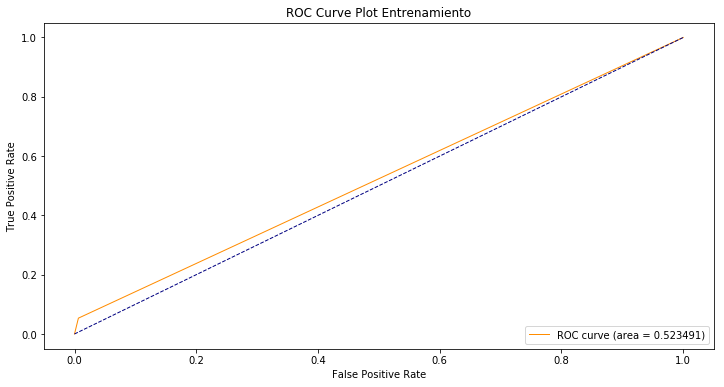

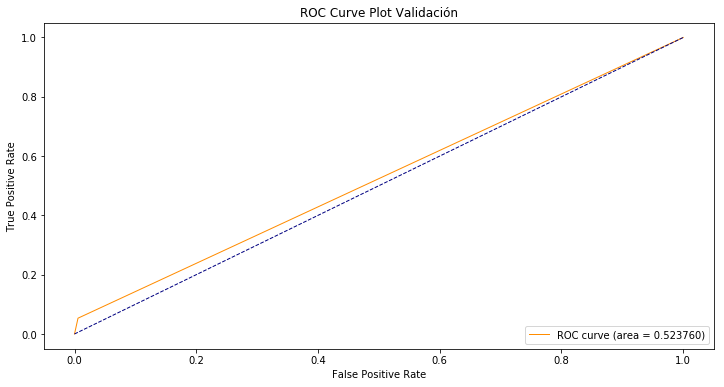

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc

#Para calcular la metrica del log loss se utilizan las probabilidades, mientras que las
#otras metricas utilizan los valores predichos

#Calculando las probabilidades de que el cliente incurra en default
Y_LOG_train = LOG.predict_proba(X_train)
Y_LOG_val = LOG.predict_proba(X_validation)

#Midiendo la efectividad del modelo con el log_loss (cuanto menor es mejor es el módelo)
print("Log_loss")
print("Entrenamiento: " + str(log_loss(Y_train, Y_LOG_train[:,1])))
print("Validación:    " + str(log_loss(Y_validation,Y_LOG_val[:,1])))

#Calculando las predicciones de que el cliente incurra en default
Y_LOG_train = LOG.predict(X_train)
Y_LOG_val = LOG.predict(X_validation)

#Midiendo la efectividad del modelo con la accuracy_score porcentaje de acierto (mas cercano a 1 mejor es el módelo)
print("")
print("Accuracy Score")
print("Entrenamiento: " + str(accuracy_score(Y_train, Y_LOG_train)))
print("Validación:    " + str(accuracy_score(Y_validation,Y_LOG_val)))

#Calculando la matriz de confusión
cnf_matrix_1 = confusion_matrix(Y_train, Y_LOG_train)
cnf_matrix_norm_1=cnf_matrix_1.astype('float') / cnf_matrix_1.sum(axis=0)
cnf_matrix_2 = confusion_matrix(Y_validation, Y_LOG_val)
cnf_matrix_norm_2=cnf_matrix_2.astype('float') / cnf_matrix_2.sum(axis=0)

print("")
print("Matriz de Confusión")
print("Entrenamiento: ") 
print(cnf_matrix_norm_1)
print("Validación:    ")
print(cnf_matrix_norm_2)

#Calculando el área bajo la curva ROC
print("")
print("ROC AUC Score")
print("Entrenamiento: " + str(roc_auc_score(Y_train, Y_LOG_train)))
print("Validación:    " + str(roc_auc_score(Y_validation,Y_LOG_val)))

fpr1, tpr1, _ = roc_curve(Y_train, Y_LOG_train)
fpr2, tpr2, _ = roc_curve(Y_validation, Y_LOG_val)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)

#Dibujando la curva ROC
def plot_roc_curve(fpr, tpr,roc_auc, titulo):
    plt.figure(figsize=(12, 6))
    plt.plot(fpr,tpr,color='darkorange',lw=1, label='ROC curve (area = %0.6f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.title('ROC Curve Plot '+str(titulo))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

plot_roc_curve(fpr1, tpr1, roc_auc1,'Entrenamiento')
plot_roc_curve(fpr2, tpr2, roc_auc2,'Validación')
    

### D. Comparación entre modelos
Una vez definidas las metricas de clasificación, ya se puede comparar que modelos ofrecen mejor calidad de predicciones, para ello vamos a probar los modelos de clasificacion disponibles de scikit learn. Pero antes vamos a reducir el número de variables para reducir el tiempo de cálculo (en la segunda parte de este tutorial de scikit learn describiré algunas de las técnicas de reducción de variables).

In [8]:
#Vamos a seleccionar las variables que tengan mejor test chi2
from sklearn.feature_selection import SelectKBest, chi2

X2_new = SelectKBest(chi2, k=10).fit_transform(X2, Y)

#Generando las muestras de entrenamiento y validación con la reducción de variables
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X2_new, Y, test_size=validation_size, random_state=seed)

Luego de haber reducido el número de variables, utilizaremos la validación cruzada , la cual consiste en dividir la muestra de entrenamiento en n número de submuestras, luego calcular los indicadores para cada submuestra y promediar los resultados. El mejor modelo sera aquel que tenga mejor indicador promedio y menor varianza para los indicadores de las submuestras. En este __[link](http://scikit-learn.org/stable/user_guide.html)__ podrán revisar los diferentes modelos disponibles en scikit learn.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

scoring = ['accuracy', 'neg_log_loss']

models = []
models.append(('LOR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('MLPC', MLPClassifier()))
models.append(('BNB', BernoulliNB()))
models.append(('GNB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('SVC', SVC(probability=True)))

results = []
names = []
kfold = model_selection.KFold(n_splits=5, random_state=seed)
for name, model in models:    
    cv_results = model_selection.cross_validate(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f %f (%f) (%f)" % (name, cv_results['test_accuracy'].mean(), cv_results['test_neg_log_loss'].mean() , cv_results['test_accuracy'].std(), cv_results['test_neg_log_loss'].std())
    print(msg)


LOR: 0.845171 -0.390617 (0.003206) (0.005736)
LDA: 0.845171 -0.391139 (0.003206) (0.005784)
QDA: 0.804829 -0.531024 (0.006165) (0.014407)
GBC: 0.844971 -0.382251 (0.003048) (0.004951)
KNC: 0.837457 -1.926624 (0.005081) (0.407827)
MLPC: 0.845200 -0.382325 (0.003171) (0.004674)
BNB: 0.680629 -0.654316 (0.009012) (0.024262)
GNB: 0.572971 -1.012031 (0.008689) (0.047754)
DTC: 0.844371 -0.439213 (0.003158) (0.014413)
RFC: 0.844200 -0.413361 (0.002922) (0.009159)
ETC: 0.844371 -0.430753 (0.003108) (0.011937)
ABC: 0.845143 -0.678550 (0.003309) (0.000116)
SVC: 0.845286 -0.430307 (0.003224) (0.005430)


Como aprecián el mejor modelo resulta ser el GradientBoostingClassifier basado en las metricas de accuracy y el logloss. Con esto concluye este post y queda pendiente la segunda parte donde tocaré otros temas como selección de variables, eliminación de outlayers, entre otros. 

Espero que les haya gustado pero como diría Porky "eso es todo amigos" :D.